In [1]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

"""
:parameter
--------------------
data: n-array like
[
[1.0 2.3 2.1 0.2]
[0.0 2.4 1.1 0.7]
]
每个元素都是有表示距离的属性的，对于没有距离属性的要抓化成具有距离属性的
"""

from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import axes3d

dir_name = '/Users/changqingli/data/time_space_cluster/'
feat_file_mini = 'fs_mini'
feat_file_all = 'fs_all'
feat_file_user_shanghai_mini = 'fs_user_shanghai_mini'
feat_file_user_shanghai_all = 'fs_user_shanghai_all'


def key_count(cluster_y):
    m = {}
    for i in cluster_y:
        if i not in m:
            m.setdefault(i, 0)
        m[i] += 1
    res = sorted(m.items(), key=lambda x: x[1], reverse=True)
    return res



In [2]:
f_data = []
user_info = {}
hour_info = {}

with open(dir_name + feat_file_user_shanghai_mini, 'r') as f:
    for line in f:
        line = line.strip().split("\t")
        if float(line[-4])<30.40 or float(line[-4])>31.53 or float(line[-3])<120.52 or float(line[-3])>122.12:
            continue
        bu_name = line[-1]
        line.insert(2, line[1][:4])  # _year
        line.insert(2, line[1][5:7])  # _month
        line.insert(2, line[1][8:10])  # _date
        line.insert(2, line[1][11:13])  # _hour
        
        if line[-1] not in user_info:
            user_info[line[-1]] = []
        user_info[line[-1]].append(line[2:-2])  # [_year,_month,_date,_hour,latitude,longitude]
        
        if line[2] not in hour_info:
            hour_info[line[2]] = {}
        if line[-1] not in hour_info[line[2]]:
            hour_info[line[2]][line[-1]] = []
        hour_info[line[2]][line[-1]].append(line[2:-2])
            


In [3]:
user_info.keys()

dict_keys(['外卖事业部', '住宿事业部', '闪购', '到餐', '猫眼文化', 'unknown', '休闲娱乐', '美团支付', '配送事业部', '丽人', '境内度假事业部', '榛果业务部', '大交通事业部', '亲子', '结婚'])

In [4]:
hour_info.keys()

dict_keys(['16', '19', '11', '10', '20', '09', '05', '08', '22', '23', '17', '14', '18', '21', '13', '15', '12', '04', '00', '01', '07', '03', '02', '06'])

In [5]:
len(hour_info['16']['外卖事业部'])
hour_info_len = {}
for i in hour_info:
    hour_info_len.setdefault(i, {})
    for bu in hour_info[i]:
        hour_info_len[i].setdefault(bu, len(hour_info[i][bu]))

        

In [20]:
hour_info_len

{'16': {'外卖事业部': 445,
  '配送事业部': 7,
  '猫眼文化': 19,
  '到餐': 64,
  '闪购': 25,
  '住宿事业部': 15,
  '境内度假事业部': 7,
  'unknown': 3,
  '大交通事业部': 2},
 '19': {'外卖事业部': 380,
  '住宿事业部': 54,
  '休闲娱乐': 14,
  '闪购': 48,
  '到餐': 61,
  '猫眼文化': 37,
  '境内度假事业部': 1,
  '大交通事业部': 1,
  '丽人': 3,
  '配送事业部': 3,
  '美团支付': 1},
 '11': {'外卖事业部': 1206,
  '到餐': 55,
  '闪购': 29,
  '住宿事业部': 21,
  '休闲娱乐': 13,
  '美团支付': 4,
  'unknown': 3,
  '猫眼文化': 9,
  '丽人': 1,
  '配送事业部': 3,
  '大交通事业部': 1,
  '境内度假事业部': 2},
 '10': {'外卖事业部': 531,
  '猫眼文化': 5,
  '到餐': 40,
  '大交通事业部': 2,
  '丽人': 1,
  '住宿事业部': 12,
  'unknown': 11,
  '闪购': 26,
  '配送事业部': 1,
  '境内度假事业部': 3,
  '美团支付': 1},
 '20': {'外卖事业部': 315,
  '丽人': 3,
  '住宿事业部': 42,
  '猫眼文化': 13,
  '闪购': 32,
  '休闲娱乐': 6,
  '到餐': 37,
  '境内度假事业部': 4,
  '美团支付': 2,
  '榛果业务部': 3},
 '09': {'外卖事业部': 204,
  '到餐': 27,
  '丽人': 1,
  '榛果业务部': 3,
  '住宿事业部': 17,
  '闪购': 19,
  '猫眼文化': 8,
  '配送事业部': 2,
  '境内度假事业部': 13,
  '美团支付': 2,
  '大交通事业部': 3,
  'unknown': 1,
  '结婚': 4,
  '休闲娱乐': 3},
 '05': {'外卖事业部': 12, '配送事业

In [32]:
a = {i : sorted(hour_info_len[i].items(), key=lambda x: x[1], reverse=True) for i in hour_info_len}


In [49]:
index = 5
for i in sorted(list(a.keys())):
    if len(a[i]) > index:
        print(i, a[i][index])

01 ('配送事业部', 1)
06 ('闪购', 1)
08 ('配送事业部', 3)
09 ('猫眼文化', 8)
10 ('猫眼文化', 5)
11 ('猫眼文化', 9)
12 ('美团支付', 12)
13 ('境内度假事业部', 9)
14 ('休闲娱乐', 11)
15 ('境内度假事业部', 13)
16 ('配送事业部', 7)
17 ('大交通事业部', 8)
18 ('美团支付', 5)
19 ('休闲娱乐', 14)
20 ('休闲娱乐', 6)
21 ('大交通事业部', 10)
22 ('休闲娱乐', 10)
23 ('猫眼文化', 9)


In [19]:
# hour_info_len['17']

for i in sorted(list(hour_info_len.keys())):
    tmp_max_len = 0
    bu_max = None
    for j in hour_info_len[i]:
        if j != '外卖事业部' and j != '到餐' and tmp_max_len <= hour_info_len[i][j]:
            bu_max = j
            tmp_max_len = hour_info_len[i][j]
    print(i, '(', bu_max, tmp_max_len, ')')
    

00 ( 住宿事业部 14 )
01 ( 住宿事业部 4 )
02 ( 住宿事业部 11 )
03 ( None 0 )
04 ( 闪购 1 )
05 ( 住宿事业部 3 )
06 ( unknown 4 )
07 ( 闪购 6 )
08 ( 闪购 14 )
09 ( 闪购 19 )
10 ( 闪购 26 )
11 ( 闪购 29 )
12 ( 猫眼文化 47 )
13 ( 闪购 38 )
14 ( 住宿事业部 24 )
15 ( 闪购 31 )
16 ( 闪购 25 )
17 ( 住宿事业部 53 )
18 ( 猫眼文化 63 )
19 ( 住宿事业部 54 )
20 ( 住宿事业部 42 )
21 ( 闪购 33 )
22 ( 住宿事业部 34 )
23 ( 休闲娱乐 24 )


In [68]:

bu_time_sort = {}
for i in user_info:
    tmp = {}
    bu_time_sort.setdefault(i, {}) 
    for j in user_info[i]:
        if j[0] not in bu_time_sort[i]:
            bu_time_sort[i][j[0]] = 0
        bu_time_sort[i][j[0]] += 1

b = {i : sorted(bu_time_sort[i].items(), key=lambda x: x[1], reverse=True) for i in bu_time_sort}

b
    


{'外卖事业部': [('11', 1206),
  ('12', 948),
  ('17', 694),
  ('18', 660),
  ('10', 531),
  ('16', 445),
  ('13', 444),
  ('14', 404),
  ('19', 380),
  ('20', 315),
  ('15', 284),
  ('22', 227),
  ('09', 204),
  ('21', 189),
  ('08', 164),
  ('23', 128),
  ('07', 80),
  ('00', 50),
  ('01', 47),
  ('02', 20),
  ('06', 19),
  ('04', 17),
  ('03', 13),
  ('05', 12)],
 '住宿事业部': [('19', 54),
  ('17', 53),
  ('20', 42),
  ('18', 39),
  ('13', 35),
  ('22', 34),
  ('15', 27),
  ('21', 27),
  ('14', 24),
  ('12', 21),
  ('11', 21),
  ('23', 17),
  ('09', 17),
  ('16', 15),
  ('00', 14),
  ('10', 12),
  ('08', 12),
  ('02', 11),
  ('07', 6),
  ('01', 4),
  ('06', 4),
  ('05', 3),
  ('04', 1)],
 '闪购': [('19', 48),
  ('13', 38),
  ('21', 33),
  ('20', 32),
  ('15', 31),
  ('11', 29),
  ('18', 27),
  ('10', 26),
  ('16', 25),
  ('17', 21),
  ('09', 19),
  ('22', 18),
  ('14', 17),
  ('12', 17),
  ('08', 14),
  ('00', 7),
  ('07', 6),
  ('23', 5),
  ('01', 3),
  ('06', 1),
  ('04', 1)],
 '到餐': [('17', 

In [77]:

bu_name = '配送事业部'
print(bu_name)
for i in range(len(b[bu_name])):
    print(b[bu_name][i])

配送事业部
('14', 8)
('16', 7)
('11', 3)
('21', 3)
('08', 3)
('19', 3)
('12', 2)
('09', 2)
('01', 1)
('05', 1)
('10', 1)
('13', 1)
('04', 1)
('00', 1)
('17', 1)


In [56]:
index = 0
for i in sorted(list(b.keys())):
    if len(b[i]) > index:
        print(i, b[i][index])
        
        

unknown ('10', 11)
丽人 ('13', 4)
亲子 ('21', 6)
休闲娱乐 ('23', 24)
住宿事业部 ('19', 54)
到餐 ('17', 131)
境内度假事业部 ('22', 15)
外卖事业部 ('11', 1206)
大交通事业部 ('15', 10)
榛果业务部 ('15', 4)
猫眼文化 ('18', 63)
结婚 ('09', 4)
美团支付 ('12', 12)
配送事业部 ('14', 8)
闪购 ('19', 48)


In [4]:
f_data = user_info['外卖事业部']
scale = MinMaxScaler()
scale.fit(f_data)
f_data_transform = scale.transform(f_data)



In [5]:
np.array(f_data, dtype='float')[:2]

array([[  16.      ,   21.      ,    9.      , 2019.      ,   31.083843,
         121.253874],
       [  19.      ,   21.      ,    9.      , 2019.      ,   31.080615,
         121.361396]])

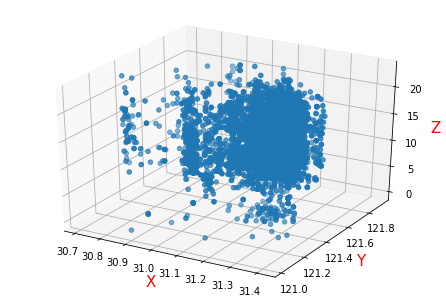

In [6]:
from mpl_toolkits.mplot3d import Axes3D

x = np.array(f_data, dtype='float')[:, 4]
y = np.array(f_data, dtype='float')[:, 5]
z = np.array(f_data, dtype='float')[:, 0]

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x, y, z)

ax.set_ylabel('Y', fontdict={'size': 15, 'color': 'red'})
ax.set_xlabel('X', fontdict={'size': 15, 'color': 'red'})
ax.set_zlabel('Z', fontdict={'size': 15, 'color': 'red'})

plt.show()

In [7]:
k_means = KMeans()
k_means.fit(f_data_transform)
cluster_train_counts = key_count(k_means.labels_)
print(cluster_train_counts)



[(2, 2738), (6, 2260), (7, 688), (1, 553), (3, 386), (4, 348), (0, 319), (5, 189)]


In [8]:
test_label = np.reshape(k_means.labels_, [len(k_means.labels_), -1])

print(np.shape(f_data_transform))
print(np.shape(test_label))



(7481, 6)
(7481, 1)


In [9]:
tsne = TSNE()
tsne.fit_transform(test_label)  # 进行数据降维,降成两维


array([[  3.0876422,  34.934444 ],
       [  3.0876422,  34.934444 ],
       [-18.281013 ,   7.876889 ],
       ...,
       [ -4.322514 , -25.393372 ],
       [ 19.355951 ,   4.3929105],
       [ 19.355965 ,   4.3929005]], dtype=float32)

In [10]:
cluster_test = np.concatenate((tsne.embedding_, test_label.reshape([len(test_label), 1])), axis=1)
df=pd.DataFrame(cluster_test, columns=['f_0', 'f_1', 'label']) #转换数据格式



In [11]:
df.head()

,f_0,f_1,label
0,3.087642,34.934444,1.0
1,3.087642,34.934444,1.0
2,-18.281013,7.876889,7.0
3,-18.281013,7.876889,7.0
4,3.087642,34.934444,1.0


label 0 has 319 sample
label 1 has 553 sample
label 2 has 2738 sample
label 3 has 386 sample
label 4 has 348 sample
label 5 has 189 sample
label 6 has 2260 sample
label 7 has 688 sample


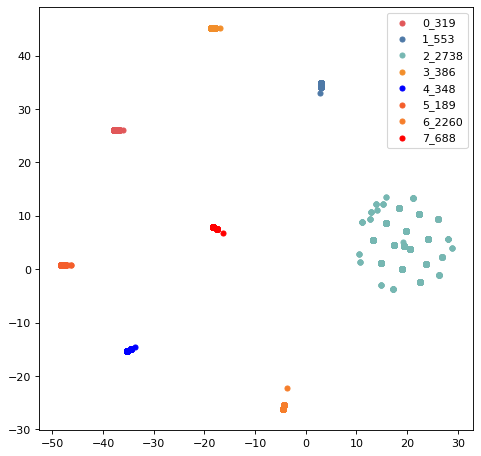

In [12]:

colr = ['#E15759', '#4E79A7', '#76B7B2', '#F28E2B','blue','#F45E2B','#F67E2B', 'r']

plt.figure(figsize=(7, 7), dpi=80)
axes = plt.subplot(111)
types = []
nums = []
for i in range(8):
    d=df[df['label']==i]
    print("label %d has %d sample" % (i, len(d['f_1'].values)))
    type1 = axes.scatter(d['f_0'].values, d['f_1'].values, s=20, c=colr[i])
    types.append(type1)
    nums.append(str(i) + '_' + str(len(d['f_1'].values)))
axes.legend(types, nums, loc=1)

d=df[df['label']==2]
# 

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


label 0 has 319 sample
label 1 has 553 sample
label 2 has 2738 sample
label 3 has 386 sample
label 4 has 348 sample
label 5 has 189 sample
label 6 has 2260 sample
label 7 has 688 sample


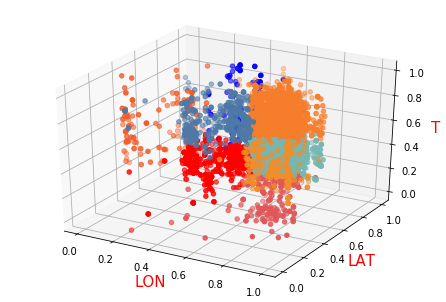

In [13]:
import matplotlib.pyplot as plt 
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

f_data_transform_cluster = np.concatenate((f_data_transform, test_label.reshape([len(test_label), 1])), axis=1)
df1=pd.DataFrame(f_data_transform_cluster, columns=['f_0', 'f_1', 'f_2', 'f_3', 'f_4', 'f_5', 'label']) #转换数据格式


colr = ['#E15759', '#4E79A7', '#76B7B2', '#F28E2B','blue','#F45E2B','#F67E2B', 'r']
fig = plt.figure()
ax = Axes3D(fig)
types = []
nums = []
for i in range(8):
    d=df1[df1['label']==i]
    print("label %d has %d sample" % (i, len(d['f_1'].values)))
    type1 = ax.scatter(d['f_4'].values, d['f_5'].values, d['f_0'].values, s=20, c=colr[i])
    types.append(type1)
    nums.append(str(i) + str(len(d['f_1'].values)))
axes.legend(types, nums, loc=1)

d=df[df['label']==2]

 
ax.set_zlabel('T', fontdict={'size': 15, 'color': 'red'})
ax.set_ylabel('LAT', fontdict={'size': 15, 'color': 'red'})
ax.set_xlabel('LON', fontdict={'size': 15, 'color': 'red'})

plt.show()
